In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [73]:
#import dataset 
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [74]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


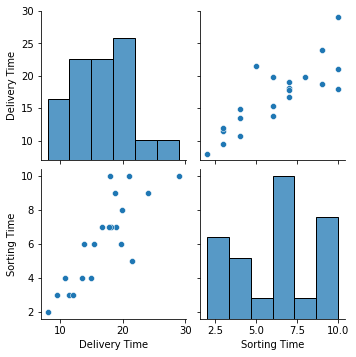

In [76]:
sns.pairplot(dataset.iloc[:,0:2])

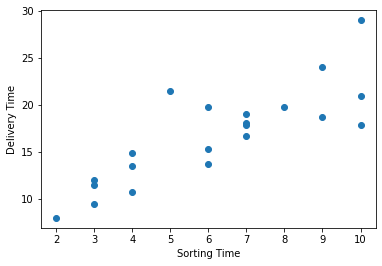

In [78]:
plt.scatter(x = dataset['Sorting Time'], y = dataset['Delivery Time'])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [80]:
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [92]:
#renaming the columns

dataset1=dataset.rename(columns={'Delivery Time': 'time_of_delivery','Sorting Time': 'Sorttime'})
dataset1.columns

Index(['time_of_delivery', 'Sorttime'], dtype='object')

In [93]:
dataset1.Sorttime.corr(dataset1.time_of_delivery)

0.8259972607955325

In [95]:
np.corrcoef(dataset1.Sorttime,dataset1.time_of_delivery)


array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [99]:
linear_model=smf.ols("Sorttime~time_of_delivery",data=dataset1).fit()
linear_model.params
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Sorttime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        21:53:11   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7567      1.134     -0.667      0.513      -3.130       1.617
time_of_delivery     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
linear_model.conf_int(0.05)

,0,1
Intercept,-3.130058,1.616712
time_of_delivery,0.278169,0.549318


In [103]:
prediction=linear_model.predict(dataset1.iloc[:,0])
print(prediction)

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64


In [115]:
x=np.array([dataset1["Sorttime"]]).reshape(-1,1)
y=np.array([dataset1["time_of_delivery"]]).reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

x_train

array([[ 6],
       [ 2],
       [ 8],
       [ 7],
       [10],
       [ 4],
       [ 6],
       [ 7],
       [ 6],
       [ 7],
       [ 7],
       [ 4],
       [ 3],
       [ 3],
       [ 9]], dtype=int64)

In [116]:
y_train

array([[19.75],
       [ 8.  ],
       [19.83],
       [16.68],
       [17.9 ],
       [13.5 ],
       [13.75],
       [18.11],
       [15.35],
       [19.  ],
       [17.83],
       [14.88],
       [12.03],
       [11.5 ],
       [24.  ]])

In [119]:
model=LinearRegression().fit(x_train,y_train)
model.score(x_test,y_test)*100

59.29026292933044

In [121]:
print('-------------------x Test---------------------\n',x_test)
print('-------------------y Test-----------------------\n',y_test)

-------------------x Test---------------------
 [[10]
 [10]
 [ 3]
 [ 9]
 [ 5]
 [ 4]]
-------------------y Test-----------------------
 [[29.  ]
 [21.  ]
 [ 9.5 ]
 [18.75]
 [21.5 ]
 [10.75]]


In [125]:
y_pred=model.predict(x_test)
print(y_pred)

[[22.20108541]
 [22.20108541]
 [11.76921708]
 [20.71081851]
 [14.74975089]
 [13.25948399]]


<function matplotlib.pyplot.show(close=None, block=None)>

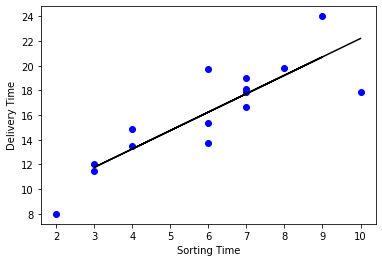

In [126]:
plt.scatter(x_train,y_train,color='b')
plt.plot(x_test,y_pred,color='k')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show